In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "pictures/"
CATEGORIES = ["Bishop", "Knight", "Pawn", "Queen", "Rook"]

In [2]:
def create_data():
    min_size = 128
    training_data = []
    for category in CATEGORIES:
        path = DATADIR + category
        category_index = CATEGORIES.index(category)
        for img in os.listdir(path):
            img_array = cv2.imread(path + '/' + img, cv2.IMREAD_GRAYSCALE)
            if img_array.shape[0] < min_size or img_array.shape[1] < min_size:
                continue
            img_resized = cv2.resize(img_array, (min_size, min_size))
            training_data.append([img_resized, category_index])
    return training_data

In [3]:
training_data = create_data()

In [4]:
import random

# to mix the data
random.shuffle(training_data)

In [5]:
X = [] # the X_training
Y = [] # the Y_training

In [6]:
for pixels, category in training_data:
    X.append(pixels)
    Y.append(category)

In [7]:
X = np.array(X)
X = X.reshape(X.shape[0], X.shape[1], X.shape[2],1)
Y = np.array(Y)
print(X.shape)
print(Y.shape)

(1949, 128, 128, 1)
(1949,)


In [8]:
import tensorflow as tf
X = X / 255.0

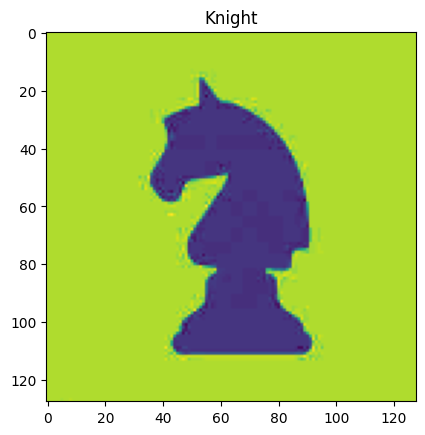

In [9]:
index_test = 67
plt.imshow(X[index_test])
plt.title(CATEGORIES[Y[index_test]])
plt.show()

In [10]:
split_size = int(0.8 * X.shape[0])

X_train = X[:split_size, :]
X_test = X[split_size:, :]

Y_train = Y[:split_size]
Y_test = Y[split_size:]

In [11]:
print(X.shape[1:])

(128, 128, 1)


In [12]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)

In [13]:
model = tf.keras.Sequential()

model.add(tf.keras.layers.Conv2D(64 , (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16, (3,3), activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(len(CATEGORIES), activation=tf.nn.softmax))

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [14]:
model.fit(X_train, Y_train, epochs=8)

Epoch 1/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 17s 295ms/step - accuracy: 0.2778 - loss: 1.5298
Epoch 2/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 291ms/step - accuracy: 0.3499 - loss: 1.4550
Epoch 3/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 292ms/step - accuracy: 0.4709 - loss: 1.3054
Epoch 4/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 295ms/step - accuracy: 0.5534 - loss: 1.1245
Epoch 5/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 290ms/step - accuracy: 0.6590 - loss: 0.9290
Epoch 6/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 299ms/step - accuracy: 0.7430 - loss: 0.7421
Epoch 7/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 14s 293ms/step - accuracy: 0.8054 - loss: 0.5584
Epoch 8/8
49/49 ━━━━━━━━━━━━━━━━━━━━ 15s 298ms/step - accuracy: 0.8559 - loss: 0.4555


In [15]:
val_loss, val_acc = model.evaluate(X_test, Y_test)
print(val_acc)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 72ms/step - accuracy: 0.6411 - loss: 1.4549
0.6153846383094788


In [16]:
predictions = model.predict(X_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step


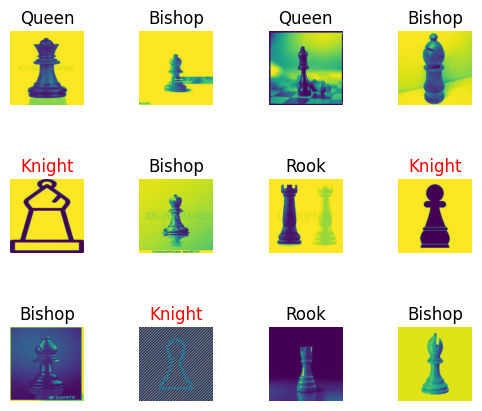

In [17]:
x = 120
y = x+12
# printing some pictures of the x_test and it's predictions as title
false_values = 0
for i in range(x, y):
    plt.subplot(3, 4, i-x+1)
    plt.subplots_adjust(hspace=1)
    plt.imshow(X_test[i])
    plt.axis('off')
    color = 'black'
    if np.argmax(predictions[i]) != Y_test[i]:
        false_values = false_values + 1
        color = 'red'
    plt.title(CATEGORIES[np.argmax(predictions[i])], color=color)
plt.show()